# Implementing Linear Regression using Ordinary Least Squares method 

<p align>Linear regression is a linear technique for establishing the relationship between a dependent variable y and one or more independent(explanatory) variables denoted X. The case of one independent variable is called simple linear regression. For more than one independent variable, the process is called multiple linear regression.</p>
<p align>We are implementing linear regression by using the Ordinary Least Squares method.Ordinary Least Squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the sum of the squares of the differences between the observed responses in the given dataset and those predicted by a linear function of a set of explanatory variables.</p>
<p align>We are using the Boston housing dataset in order to predict the price of the houses based on the features like average number of rooms per dwelling, full-value property-tax rate per $10,000, etc. We have used all the features for our implementation algorithm and predicted the prices for the houses in Boston. </p>



In [23]:
#importing the libraries that are used in the program
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn import metrics
%matplotlib inline


<p align>We have loaded the Boston housing dataset into our program.
Later, we normalised the dataset and added one more column called 'BIAS' and assigned it with value 1. This column allows to account for unexpalainable variance in the data. For example it can account for noise in the data. </p>
<p align>We retrieve the response which is the price of the houses and assign it to Y. </p>




In [24]:
#Loading the data 
boston = load_boston() 
Xraw = pd.DataFrame(boston.data)

# adding extra column
Xraw.columns = boston.feature_names
Xraw["BIAS"]=1
Y = pd.DataFrame({"PRICE":boston.target})

# defining variables for function
cal_accuracy_validation=[]
cal_accuracy_lib_validation=[]
beta_best=[]

#normalization of data
Xnor = sklearn.preprocessing.normalize(Xraw)
X=pd.DataFrame(Xnor)

<p align>We divide the dataset into rest data and test data. Later we use the rest data to train our model and test it with test data.</p>
<p align>We use 5 fold validation on the rest data.</p>

In [25]:
X_rest, X_test, y_rest, y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

kf = KFold(n_splits=5)
kf.get_n_splits(X_rest)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


<p align> We are defining a function for performing algorithms and estimating accuracy. We are implementing ordinary least square method using our algorithm and machine learning API (sklearn). </p>
<p align> We are randomly assigning some points of the rest data as training data and validation data.</p>
<p align> We perform our algorithm on the entire rest data,  take some points as validation data and find the accuracy for that validation data.

For linear algebra model, we use the following equation to calculate beta:
            beta=(X^TX)^-1X^T*Y 
            
Then with the beta value we calculate the linear regression as follows:
                Y=beta*X+c

</p>
<p align> For the machine learning model, we use the built in library funtion imported from sklearn. </p>




In [26]:
def linear_ols():
    X_train, X_validation, y_train, y_validation = X_rest.iloc[train], X_rest.iloc[validation], y_rest.iloc[train], y_rest.iloc[validation]
    
    
    # linear algebra model 
    ## training 
    beta=np.linalg.inv(X_rest.T.dot(X_rest)).dot(X_rest.T).dot(y_rest)
    beta_best.append(beta)
    
    ### For validation data 
    
    ## prediction 
    y_pred_validation=np.dot(X_validation,beta)
    
    accuracy_validation=metrics.r2_score(y_validation,y_pred_validation)
    
    ## accuracy 
    cal_accuracy_validation.append(accuracy_validation)
    
    # library model 
    ## training 
    regr=linear_model.LinearRegression()
    model=regr.fit(X_rest,y_rest)
    

    ### For training data 
    ### Far validation data 
    ## prediction 
    y_pred_lib_validation=regr.predict(X_validation)
    accuracy_lib_validation=metrics.r2_score(y_validation,y_pred_lib_validation)
    
    ## accuracy 
    cal_accuracy_lib_validation.append(accuracy_lib_validation)
    
    return regr
    

    
    

Here we are calling the function 5 times, because we have created 5 fold validation

In [27]:
for train, validation in kf.split(X_rest):
    reg=linear_ols()

Here we are printing the accuracy of our algorithm for validation data.

In [28]:
print('linear algebra model accuracy values')

print(cal_accuracy_validation)

linear algebra model accuracy values
[0.75781861862447009, 0.76493614184818115, 0.72667377744331496, 0.60928319478929005, 0.81823296090950381]


Here we print the accuracy of the Machine learning API for validation data.

In [29]:
print('Machine learning API model accuracy values')

print(cal_accuracy_lib_validation)

Machine learning API model accuracy values
[0.75761548545195267, 0.76598271934209938, 0.72680526165141779, 0.60951694948679247, 0.81719079878357292]


From the validation data we get 5 accuracies for our algorithm. We will take the highest accuracy and print the corresponding beta value. 

In [30]:
print(beta_best[4])

[[ -8.93784831e+01]
 [  1.44851727e+01]
 [  1.84089486e+01]
 [  1.46470725e+03]
 [ -6.71029005e+03]
 [  2.56935324e+03]
 [  3.52061339e-01]
 [ -5.79329579e+02]
 [  2.01859391e+02]
 [  6.68575008e+00]
 [ -4.62654246e+02]
 [  1.46345991e+01]
 [ -2.58454619e+02]
 [  3.94121692e+03]]


We use the Beta value in the test data and calculate the accuracy for test data. We then plot the graph of predicted prices vs actual prices (test data) for our linear algebra algorithm.

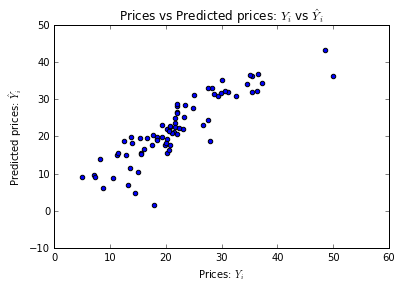

In [31]:
# linear algebra model on test data 
y_pred_test=np.dot(X_test,beta_best[4])
accuracy_test=metrics.r2_score(y_test,y_pred_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")


In [32]:
print('test accuracy for linear algebra model:', accuracy_test)

('test accuracy for linear algebra model:', 0.75699106144338701)


For our Machine learning API, We predict the values on the test data set and calculate the accuracy for test data.

In [33]:
y_pred_lib_test=reg.predict(X_test)

In [34]:
accuracy_lib_test1=metrics.r2_score(y_test,y_pred_lib_test)

In [35]:
print('test accuracy for Library model:',accuracy_lib_test1)

('test accuracy for Library model:', 0.75514638489921559)


We are plottting the graph for actual price vs predicted price for machine learning API for test data.

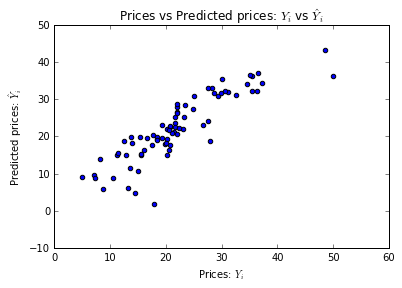

In [36]:
plt.scatter(y_test, y_pred_lib_test)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

<p align>Explaination: Since we had less data points in the dataset we split the data into training and testing set. In total we had 505 data points and we split that into 430 training data points and 75 testing data points. 
Further, we trained the model on the training data and chose XX number points to check the training accuracy of the 
both the linear models. Atlast, we used these trained models to predict the test accuracy. </p>
 <p align>   Now, we also tried to split the data into train, validation and test data but as our data points were less we found that both models were under-fitting the data by comparing the test, validation, and test accuracy. Thus, we chose to split the data into training and testing data, and hence reported the results. </p>